<h1> Lab exercise 3: Eigenvalues and SVD</h1>

## Part 2: Low rank approximation and dimensionality reduction with SVD

_There are many important applications in data analysis where SVD is used. One such application has to do with dimensionality reduction. If we have a big data set with many variables (stored as a big matrix), it may be reasonable to think that not all of the variables are equally important for the problem, and that it can therefore be possible to reduce the dimensionality of the problem. To do this, we can use the SVD. Here, we will look at one such example, namely image compression._ 

<h3>Image compression</h3>

We will here go through dimensionality reduction on a stinkbug image, step by step, using SVD. This is one way of compressing images.<br>
_1.1) First, import the image by running the cell below. Make sure that you have saved the image in the working directory._

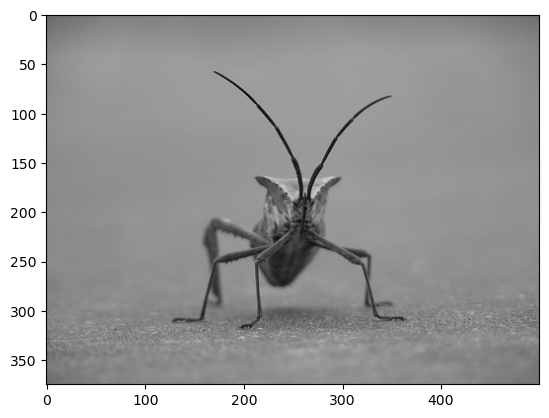

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread('stinkbug.png')
plt.imshow(img, cmap='gray')

_1.2) Unfortunately, the image is stored as a 3D-array, as you can see if you check the shape of ${\tt img}$ with ``np.shape()``. Check the shape of the image._

In [3]:
np.shape(img)

(375, 500, 3)

The reason it is a 3D-array is due to the way images are normally stored. It is possible to do SVD on 3D-matrices, but it is not part of this course. To make it simpler we will therefore work with a 2D-array.<br>

_1.3) Convert the 3D-image to a 2D-array by running the code snippet below. This will create a new image (${\tt GrayImage}$) stored in a 2D-array._

In [4]:
R = img[:, :, 0]
G = img[:, :, 1]
B = img[:, :, 2]
GrayImage = R * 0.2126 + G * 0.7152 + B * 0.0722

_1.4) Check the shape of ${\tt GrayImage}$, and plot the image again._

In [5]:
np.shape(GrayImage)

(375, 500)

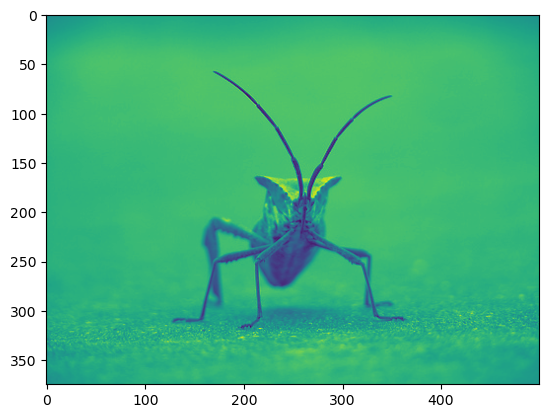

In [5]:
# plt.imshow(GrayImage, cmap='gray')
plt.imshow(GrayImage)

<b>Compression using SVD</b><br>
_1.5) We will now use SVD to compress the image, which is equal to a dimensionality reduction. We will transform the image-matrix to matrices $U, S$ and $V$, such that $A = U\cdot S \cdot V^T$. The idea is to "cut off" some of the singular values, and then go back to the image again by multiplying the "cut-off" matrices (this is described in more detail below). Run the cell below to perform the SVD._

In [6]:
U, S, Vt = np.linalg.svd(GrayImage, full_matrices = False)

According to the theory, if $A$ is $m \times n$, then:<br>
- $U$, should be $m \times m$
- $S$, should be $m \times n$
- $V^T$, should be $n \times n$

_1.6) Check the shapes of $U$, $S$ and $V^T$. Are the shapes correct?_<br>

Hint: What is $m$ and $n$ in this case (the shape of $A$)?

In [7]:
np.shape(U), np.shape(S), np.shape(Vt)

((375, 375), (375,), (375, 500))

Clearly, $S$ is not a matrix, but a vector. The reason is that only the singular values, no zeros, are stored.<br>
The size of matrix $V$ is also wrong. The reason is that we put `full_matrices=False` in the SVD-call, which generates the so called "reduced" or "economical" form.
<br><br>

_1.7) SVD always generates the singular values in descending order. The smaller values contribute less in the multiplication $USV^T$, i.e. contribute less to the matrix $A$. Check the size of the singular values by plotting them (with 1, 2, 3, ... up to the the number singular values on the x-axis)._

Hint: Create an x-axis with the command `x=np.arange(1,len(S)+1)` and then plot the singular values stored in $S$ using the command `plt.plot(x,S)`.

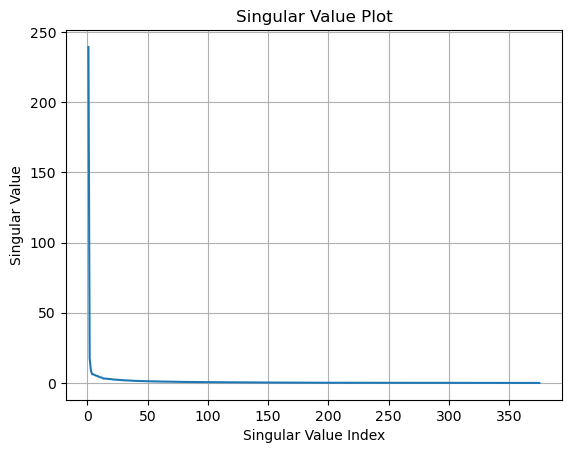

In [8]:
# Create an x-axis with the number of singular values
x = np.arange(1, len(S) + 1)

# Plot the singular values
plt.plot(x, S)
plt.xlabel("Singular Value Index")
plt.ylabel("Singular Value")
plt.title("Singular Value Plot")
plt.grid(True)
plt.show()

_1.8) The singular values are obviously only big in the beginning, and the get smaller very rapidly. Change the plot to only look at the first 10 singular values. You can do this by adjusting the plot-command to `plt.plot(x[:10],S[:10])`. Or just look at singular values from the tenth and up, use `plt.plot(x[10:],S[10:])`.<br>
Try it!_

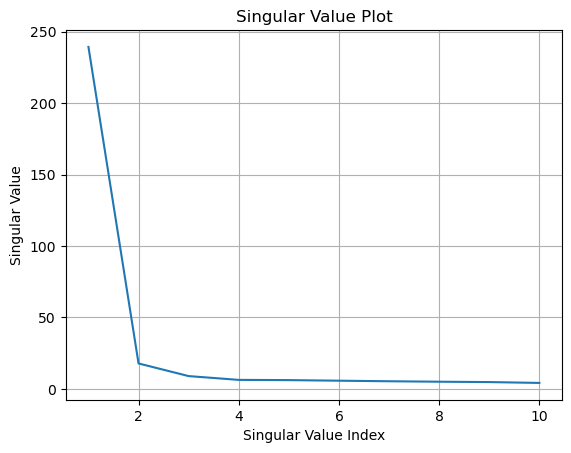

In [9]:
x = np.arange(1, len(S) + 1)

# Plot the singular values
plt.plot(x[:10],S[:10])
plt.xlabel("Singular Value Index")
plt.ylabel("Singular Value")
plt.title("Singular Value Plot")
plt.grid(True)
plt.show()

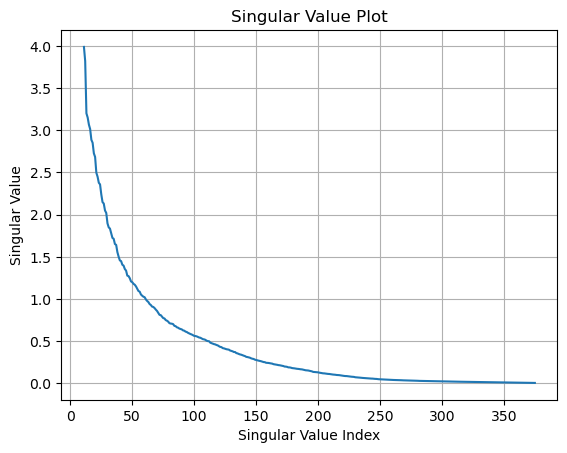

In [10]:
x = np.arange(1, len(S) + 1)

# Plot the singular values
plt.plot(x[10:],S[10:])
plt.xlabel("Singular Value Index")
plt.ylabel("Singular Value")
plt.title("Singular Value Plot")
plt.grid(True)
plt.show()

If we cut-off the "tail" and recreate the matrix $A_c=U_cS_cV^T_c$, where $U_c, S_c, V^T_c$ are the "cut-off" matrices, it shouldn't affect the matrix that much as we just remove small singular values.<br>

Let's say we decide to keep the $r$ first singular values. We will then have to keep
- the $r$ first columns of $U$
- the $r$ first singular values in $S$
- the $r$ first rows in $V^T$

_1.9) Let $r=20$ and try to create $U_c$, $S_c$ and $V^T_c$. Also check the shape of the new matrices._

In [11]:
# Set the number of singular values to keep (r=20)
r = 20

# Create truncated matrices U_c, S_c, and Vt_c
U_c = U[:, :r]
S_c = np.diag(S[:r])
Vt_c = Vt[:r, :]

# Check the shapes of the truncated matrices
print("Shape of U_c:", U_c.shape)
print("Shape of S_c:", S_c.shape)
print("Shape of Vt_c:", Vt_c.shape)

Shape of U_c: (375, 20)
Shape of S_c: (20, 20)
Shape of Vt_c: (20, 500)


We have now changed the dimension of the image from 375 to $r$.<br><br>

_1.10) Create a new image-matrix by multiplying $A_c = U_cS_cV^T_c$. According to the `np.linalg.svd` reference manual, the multiplication can be done according to `np.dot(U * S, Vt)` for the reduced form of SVD. Do the multiplication and create a new image-matrix $A_c$. Then use `plt.imshow(A_c, cmap='gray')` to draw the compressed image. Does it look a lot different from the original image?_

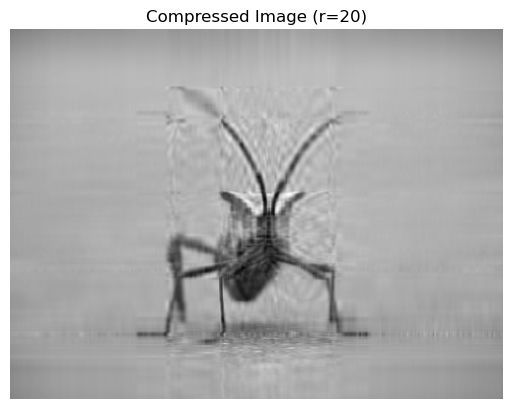

In [12]:
# Reconstruct the compressed image matrix A_c
A_c = np.dot(np.dot(U_c, S_c), Vt_c)

# Plot the compressed image
plt.imshow(A_c, cmap='gray')
plt.title(f"Compressed Image (r={r})")
plt.axis('off')
plt.show()

_1.11) Try different degrees of dimensionality reduction by varying the parameter $r$. How many dimensions can you remove if the image should still look acceptable?_

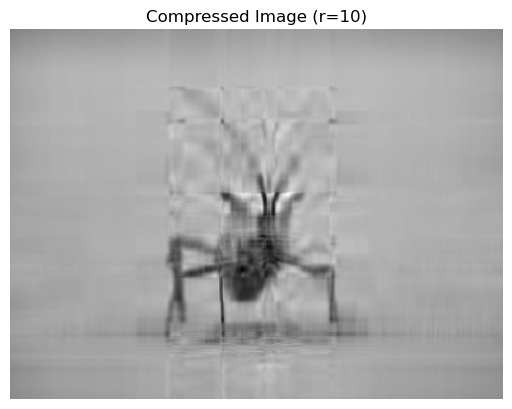

In [13]:
# Perform SVD
U, S, Vt = np.linalg.svd(GrayImage, full_matrices=False)

# Set the number of singular values to keep (r=20)
r = 10

# Create truncated matrices U_c, S_c, and Vt_c
U_c = U[:, :r]
S_c = np.diag(S[:r])
Vt_c = Vt[:r, :]

# Reconstruct the compressed image matrix A_c
A_c = np.dot(np.dot(U_c, S_c), Vt_c)

# Plot the compressed image
plt.imshow(A_c, cmap='gray')
plt.title(f"Compressed Image (r={r})")
plt.axis('off')
plt.show()

<h3>Check This Out</h3>
You can play around with image compression on real colour images here: <a href="https://timbaumann.info/svd-image-compression-demo/" target="_blank">Image compression with SVD demo</a>. You can see the size of the singular values for different images, and also change the compression with a little ruler. 

### Principal Component Analysis (PCA)

Another well-known dimensionality reduction technique in data analysis is Principal Component analysis, PCA. The idea is to find the directions where most variation (the covariance) is located. Often it is possible to find two axes where most of the data variation is, and then reduce the dimensionality to two. PCA is also based on the SVD-decomposition.

Here, we engage in practice with point clouds in both two and three dimensions. In the cell below, we are creating a 2D random point cloud and plotting it: 

(-6.854618109182135, 9.33612949975506, -6.511392924143443, 10.120049171514648)

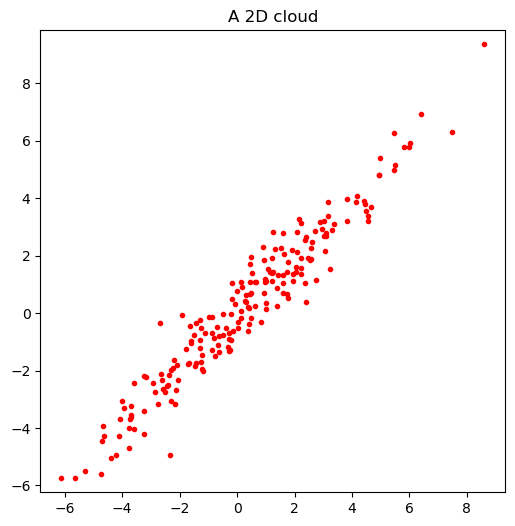

In [19]:
# a 2D cloud
import numpy as np
import matplotlib.pyplot as plt

x = 0.5*np.random.normal(size = 200)
y = 4 * np.random.normal(size = 200)
A = np.array([x,y])
# rotate the points anticlockwise by pi/4
R  = np.array([[np.cos(np.pi/4),np.sin(np.pi/4)],[-np.sin(np.pi/4),np.cos(np.pi/4)]]) 
A = R@A 
plt.figure(figsize = (6, 6))
plt.scatter(A[0,:],A[1,:],marker = '.',color = 'red')
plt.title("A 2D cloud")
plt.axis('equal')

To project these points to the first principal direction (say $u_1$), compute the SVD of $A$, and compute the rank one approximation $A_1 = U_1\Sigma_1 V_1$. Finally plot $A_1$:

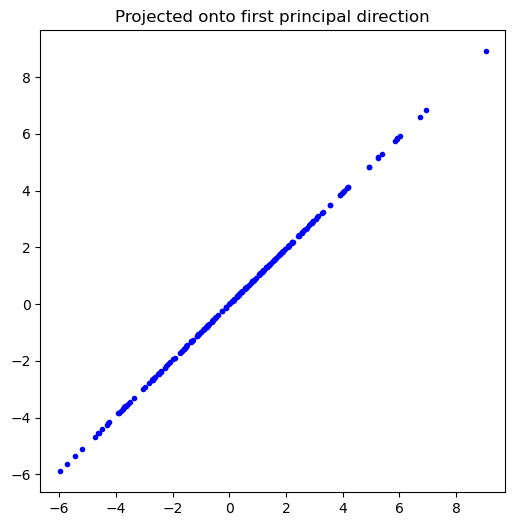

In [21]:
# Compute the SVD
U, Sigma, VT = np.linalg.svd(A)

# Extract the first principal component direction
u1 = U[:, 0]

# Compute the rank-one approximation
A1 = np.outer(u1, Sigma[0] * VT[0])

# Plot the projected points
plt.figure(figsize = (6, 6))
plt.scatter(A1[0, :], A1[1, :], marker='.', color='blue')
plt.title("Projected onto first principal direction")
plt.axis('equal')

plt.show()

Since $A$ is a $2\times 200$ matrix, its rank-2 approximation will effectively yield the original matrix $A$ itself. Now, let's work with a random 3D point cloud generated using the following code:

Text(0.5, 0.92, 'A 3D cloud')

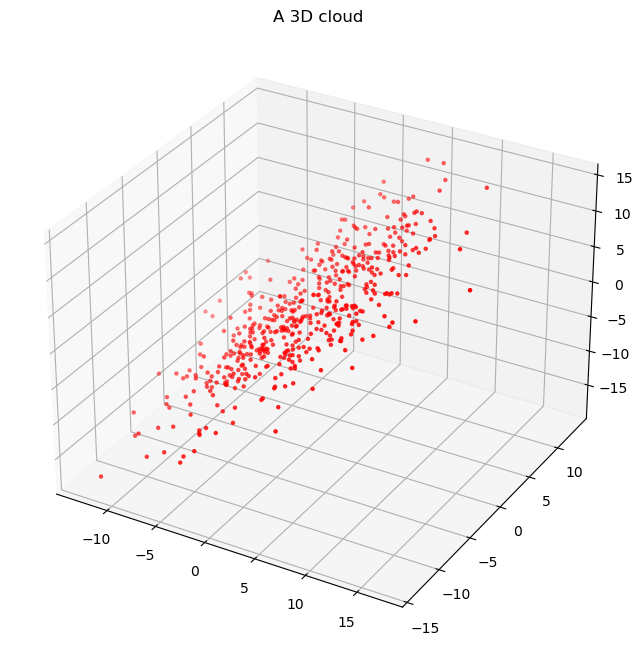

In [22]:
# a 3D cloud
x = 0.5*np.random.normal(size = 500)
y = 8*np.random.normal(size = 500)
z = 4*np.random.normal(size = 500)
A = np.array([x,y,z])
c,s = np.cos(np.pi/4),np.sin(np.pi/4)
R1  = np.array([[c,s,0],[-s,c,0],[0,0,1]])
c,s = np.cos(-np.pi/4),np.sin(-np.pi/4)
R2  = np.array([[1,0,0],[0,c,s],[0,-s,c]])
c,s = np.cos(np.pi/2),np.sin(np.pi/2)
R3  = np.array([[c,0,s],[0,1,0],[-s,0,c]])
A = R1@R2@R3@A 
# plot
fig = plt.figure(figsize = (8, 8))
ax = plt.axes(projection ="3d") 
ax.scatter3D(A[0,:], A[1,:], A[2,:],color = 'red', marker ='.')
plt.title("A 3D cloud")

Compute the SVD of matrix $A$ and project this point cloud onto the first principal direction $u_1$ (reducing the dimension to 1). Then, project the points onto the plane formed by the first and second principal directions $u_1$ and $u_2$ (reducing the dimension to 2). For each scenario, create a plot illustrating the projected points:

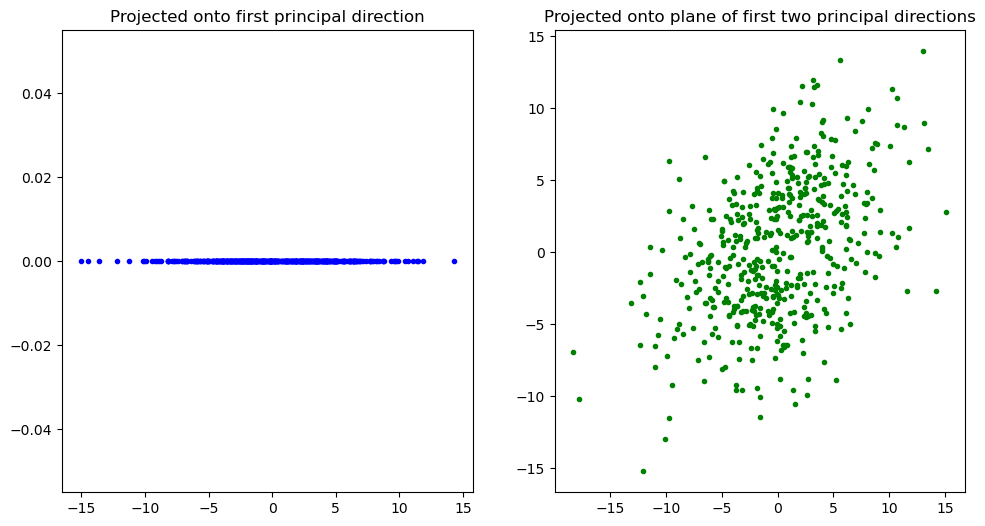

In [26]:
# Compute the SVD
U, Sigma, VT = np.linalg.svd(A)

# Extract the principal components
u1 = U[:, 0]
u2 = U[:, 1]

# Project onto the first principal direction
A1 = np.outer(u1, Sigma[0] * VT[0])

# Project onto the plane formed by the first two principal directions
A2 = np.outer(u1, Sigma[0] * VT[0]) + np.outer(u2, Sigma[1] * VT[1])

# Plot the original and projected points
fig = plt.figure(figsize=(18, 6))

# Projected onto the first principal direction
ax2 = fig.add_subplot(132)
ax2.scatter(A1[0, :], np.zeros_like(A1[0, :]), color='blue', marker='.')
ax2.set_title("Projected onto first principal direction")

# Projected onto the plane formed by the first two principal directions
ax3 = fig.add_subplot(133)
ax3.scatter(A2[0, :], A2[1, :], color='green', marker='.')
ax3.set_title("Projected onto plane of first two principal directions")

plt.show()
